<a href="https://colab.research.google.com/github/jpherediam/TareasDPRO/blob/main/Analisis_datos__iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame de variables explicativas (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Serie objetivo (y):
0    0
1    0
2    0
3    0
4    0
Name: Especies, dtype: int64 

DataFrame combinado (df):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0

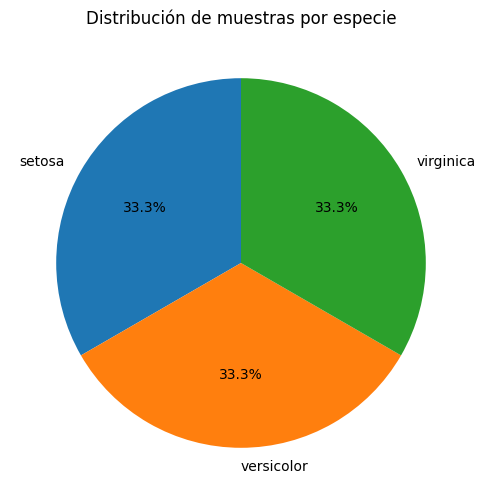

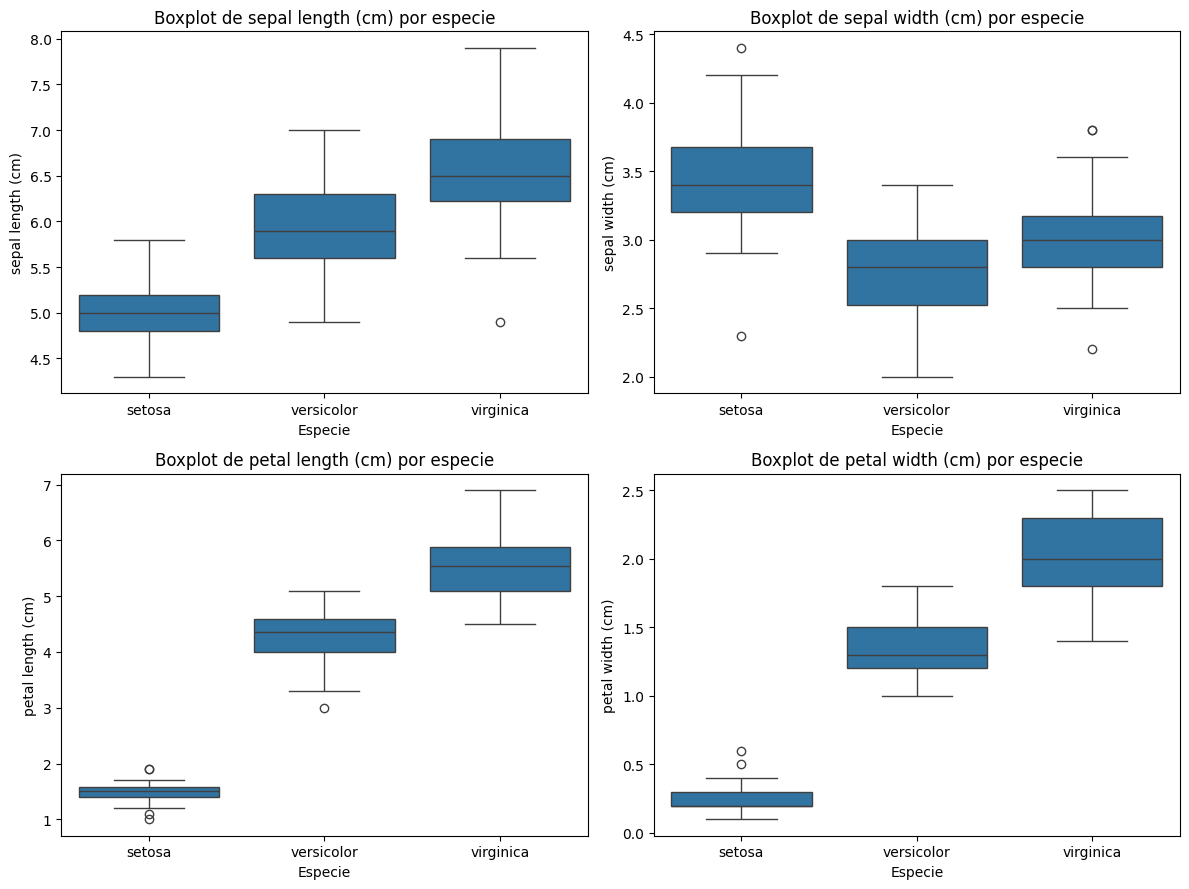

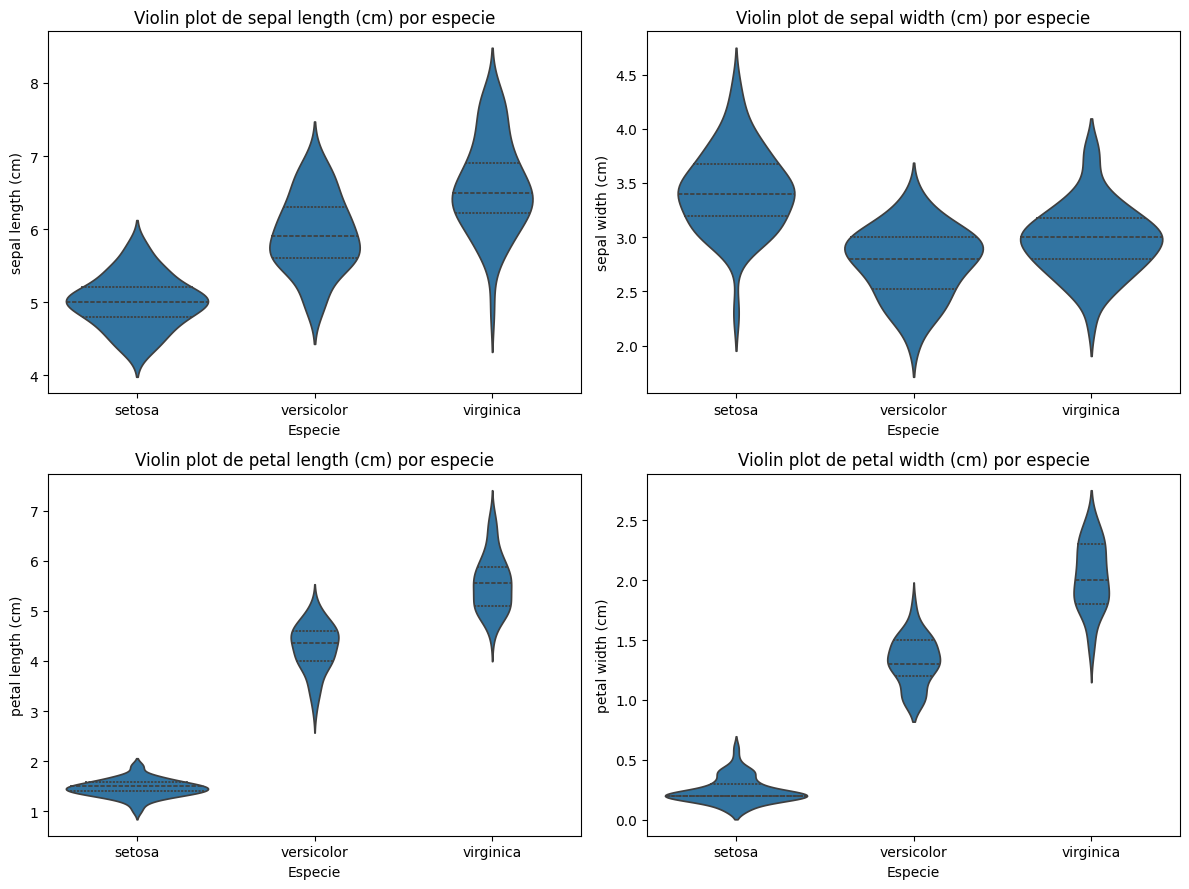

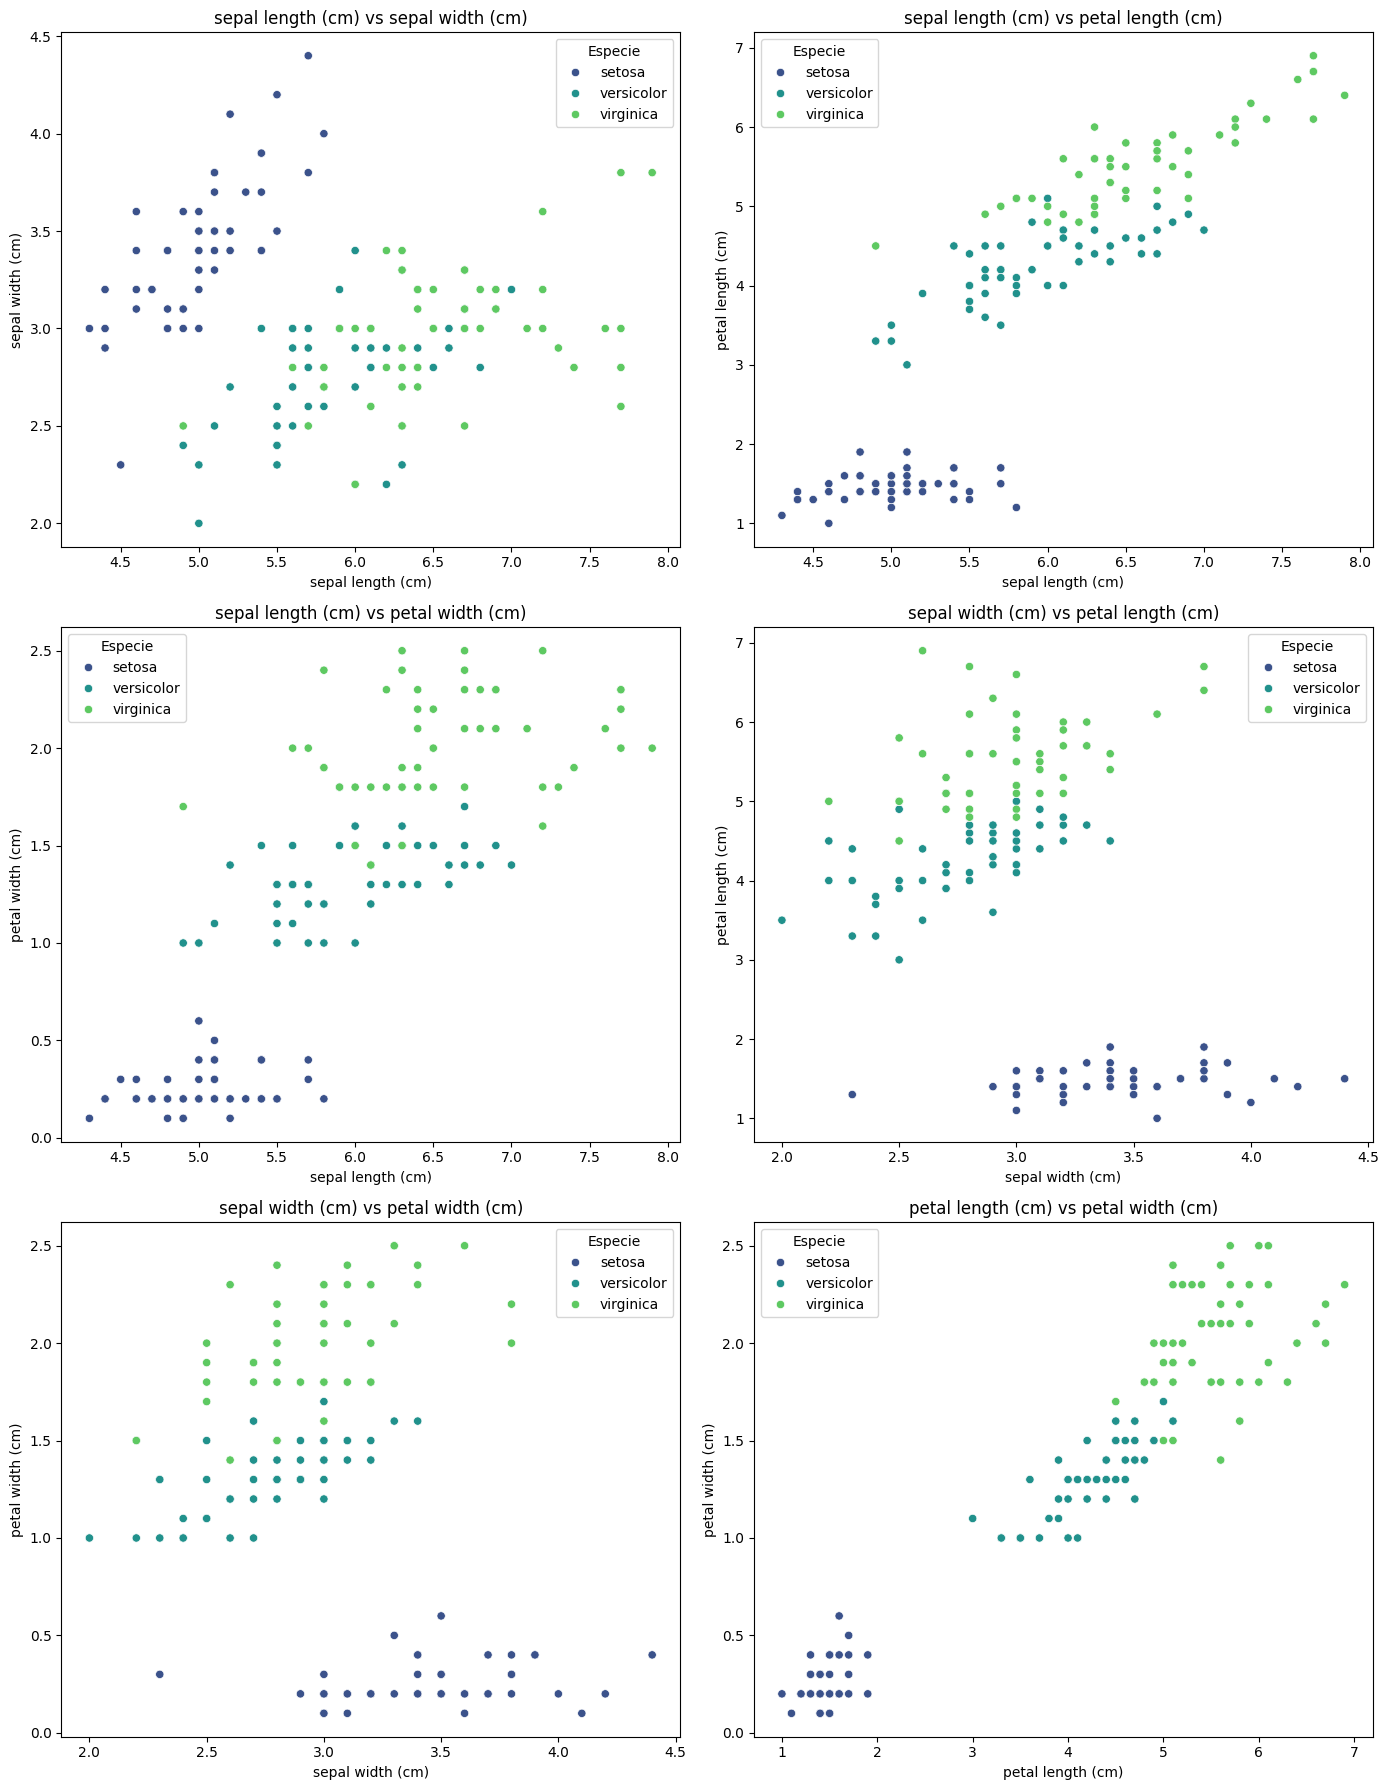

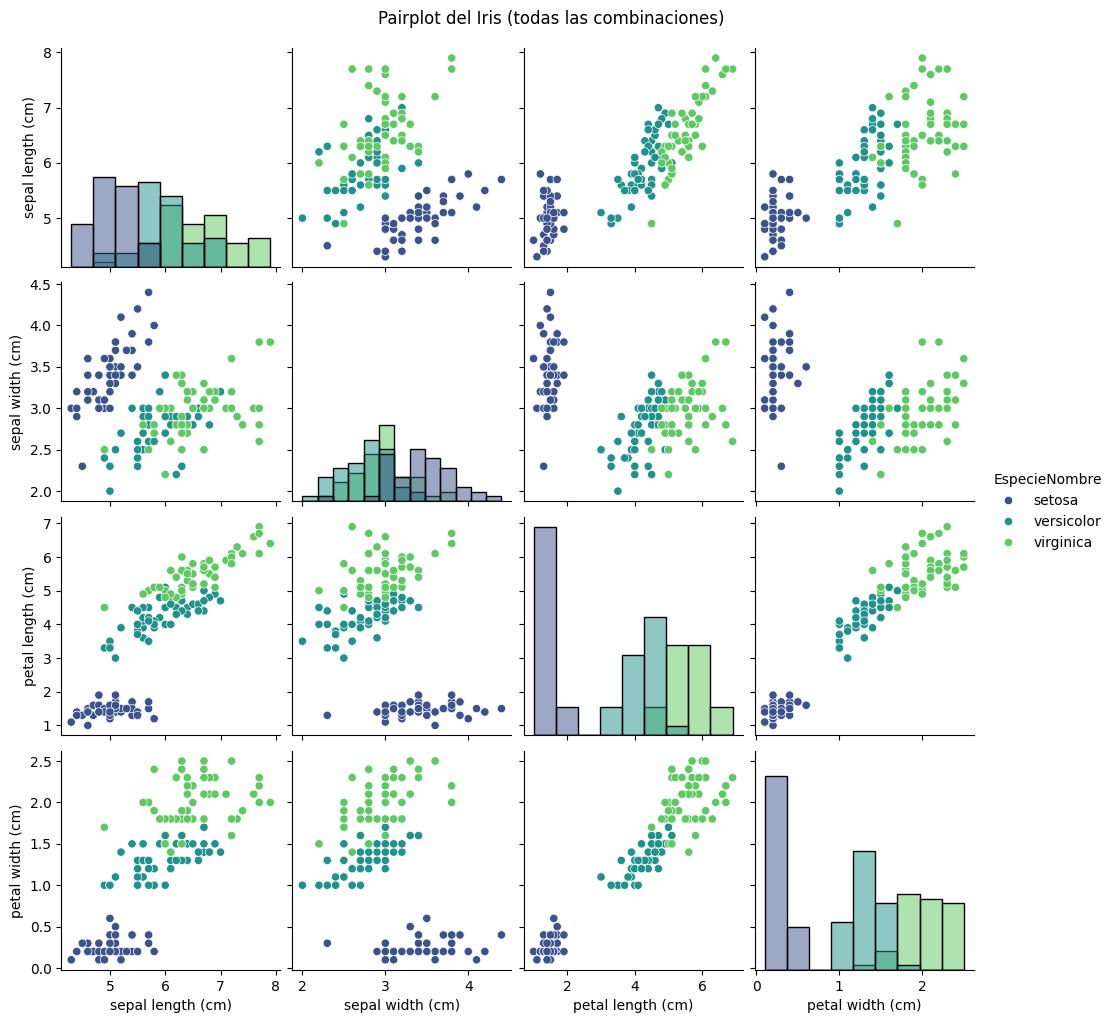

Matriz de correlación:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000   



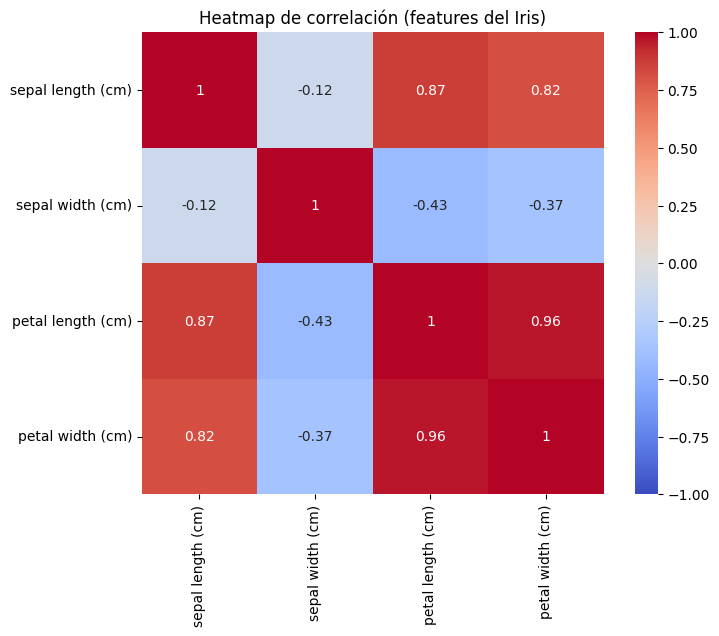

"\nObservaciones:\n- 'petal length (cm)' y 'petal width (cm)' separan muy bien a setosa de las otras,\n  y en pairplot también distinguen bastante bien versicolor y virginica.\n- 'sepal width (cm)' muestra mayor solapamiento entre clases; es menos discriminativa.\n- La correlación entre 'petal length' y 'petal width' es alta y positiva (~0.96),\n  lo que sugiere redundancia informativa entre esas dos variables.\nEstas conclusiones ayudan a entender qué rasgos son más útiles para clasificación.\n"

In [1]:
# =========================================================
# Iris de Fisher – EDA completo
# =========================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1) Carga y creación de X, y
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)       # 4 features
y = pd.Series(iris.target, name="Especies")                   # 0/1/2

print("DataFrame de variables explicativas (X):")
print(X.head(), "\n")
print("Serie objetivo (y):")
print(y.head(), "\n")

# 2) Unir X e y
df = pd.concat([X, y], axis=1)
# Columna con el nombre de especie (mejor para gráficos)
df["EspecieNombre"] = df["Especies"].map(dict(enumerate(iris.target_names)))

print("DataFrame combinado (df):")
print(df.head(), "\n")

# 3) Comprobaciones de datos
print("Primeras 4 muestras de df:")
print(df.head(4), "\n")

print("df.info():")
print(df.info(), "\n")

print("Conteo por clase (y):")
print(df["Especies"].value_counts(), "\n")

print("¿Valores faltantes por columna?")
print(df.isnull().sum(), "\n")

print("Resumen estadístico (features):")
print(df[iris.feature_names].describe(), "\n")

# 4) Comentario teórico (dejas tu texto)

# 5) Extracciones pedidas (loc/iloc)
# 'sepal_width' por 2 formas
sepal_width_by_loc  = df.loc[:, "sepal width (cm)"]
sepal_width_by_iloc = df.iloc[:, 1]
print("OK extracción 'sepal width (cm)' por loc/iloc.")

# Filas 50..99 (ojo: iloc excluye el 100)
data_50_to_99 = df.iloc[50:100]
print("\nFilas 50..99 (muestra):")
print(data_50_to_99.head())

# 'petal_length' en filas 50..99
petal_length_50_99 = df.iloc[50:100, 2]
print("\n'petal length (cm)' en filas 50..99 (muestra):")
print(petal_length_50_99.head())

# Filtrar por 'petal_width' == 0.2
petal_width_0_2 = df.loc[df["petal width (cm)"] == 0.2]
print("\nFilas con 'petal width (cm) == 0.2' (muestra):")
print(petal_width_0_2.head(), "\n")

# 6) Gráficos básicos
# Pie chart por especie
plt.figure(figsize=(6,6))
df["EspecieNombre"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Distribución de muestras por especie")
plt.ylabel("")
plt.show()

# Boxplot y Violin para CADA feature
features = iris.feature_names

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.ravel()
for ax, feat in zip(axes, features):
    sns.boxplot(x="EspecieNombre", y=feat, data=df, ax=ax)
    ax.set_title(f"Boxplot de {feat} por especie")
    ax.set_xlabel("Especie"); ax.set_ylabel(feat)
plt.tight_layout(); plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.ravel()
for ax, feat in zip(axes, features):
    sns.violinplot(x="EspecieNombre", y=feat, data=df, ax=ax, inner="quartile")
    ax.set_title(f"Violin plot de {feat} por especie")
    ax.set_xlabel("Especie"); ax.set_ylabel(feat)
plt.tight_layout(); plt.show()

# 7) Relación entre características
# a) 6 scatterplots (todas las combinaciones de 2 en 4)
pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        pairs.append((features[i], features[j]))

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.ravel()
for ax, (fx, fy) in zip(axes, pairs):
    sns.scatterplot(x=fx, y=fy, hue="EspecieNombre", data=df, ax=ax, palette="viridis")
    ax.set_title(f"{fx} vs {fy}")
    ax.legend(title="Especie")
plt.tight_layout(); plt.show()

# b) Pairplot
sns.pairplot(df, vars=features, hue="EspecieNombre", diag_kind="hist", palette="viridis")
plt.suptitle("Pairplot del Iris (todas las combinaciones)", y=1.02)
plt.show()

# c) Matriz de correlación + heatmap
corr = df[features].corr()
print("Matriz de correlación:\n", corr, "\n")

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Heatmap de correlación (features del Iris)")
plt.show()

# 8) Explicación (texto libre, ejemplo):
"""
Observaciones:
- 'petal length (cm)' y 'petal width (cm)' separan muy bien a setosa de las otras,
  y en pairplot también distinguen bastante bien versicolor y virginica.
- 'sepal width (cm)' muestra mayor solapamiento entre clases; es menos discriminativa.
- La correlación entre 'petal length' y 'petal width' es alta y positiva (~0.96),
  lo que sugiere redundancia informativa entre esas dos variables.
Estas conclusiones ayudan a entender qué rasgos son más útiles para clasificación.
"""